## 1. Problem Statement
The second-hand car market is vast, and predicting the price of a used car is a challenging task due to various factors influencing the price. Feature engineering and dimensionality reduction play a crucial role in improving the performance of predictive models by enhancing the quality of input data and reducing noise.

## 2. Import dataset and the necessary libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from  datetime import datetime
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform




In [29]:
data = pd.read_csv('second_hand_cars.csv')
data.head()


,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,NaN
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


In [30]:
data_original = data.copy()

## 3. Basic EDA

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

In [32]:
data.describe()

,Make Year,Mileage,Price
count,2500.000000,2500.000000,2500.000000
mean,2019.521600,104777.792000,608120.897600
std,2.894146,55544.487467,231056.126713
min,2015.000000,10010.000000,200176.000000
25%,2017.000000,56313.000000,407791.000000
50%,2020.000000,104209.500000,612012.500000
75%,2022.000000,152149.250000,804567.000000
max,2024.000000,199755.000000,999826.000000


In [33]:
# Categorical columns
cat_columns = data.select_dtypes(object).columns
cat_columns

Index(['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
       'Owner Type', 'Registration Number', 'Transmission Type', 'Body Color',
       'Service Record', 'Insurance', 'Registration Certificate',
       'Accessories'],
      dtype='object')

In [34]:
#Numerical columns
num_columns = data.select_dtypes(include='number').columns
num_columns

Index(['Make Year', 'Mileage', 'Price'], dtype='object')

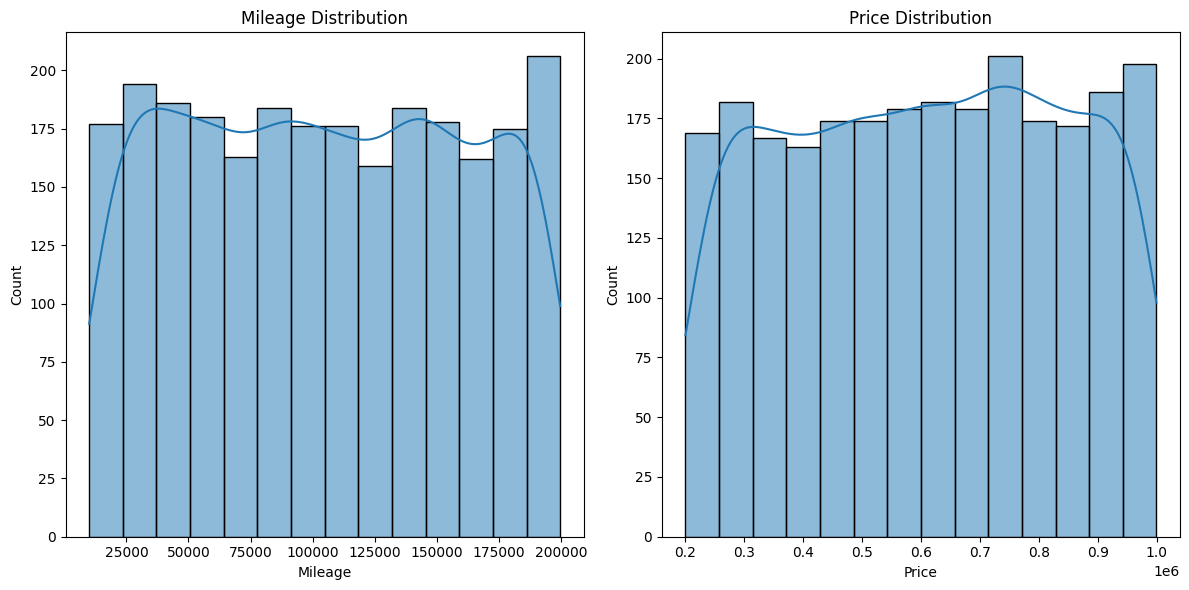

In [35]:
#Distribution

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Mileage distribution on the first subplot (axes[0])
sns.histplot(data['Mileage'], kde=True, ax=axes[0])
axes[0].set_title('Mileage Distribution')

# Plot Price distribution on the second subplot (axes[1])
sns.histplot(data['Price'], kde=True, ax=axes[1])
axes[1].set_title('Price Distribution')

# Display the plots
plt.tight_layout()
plt.show()


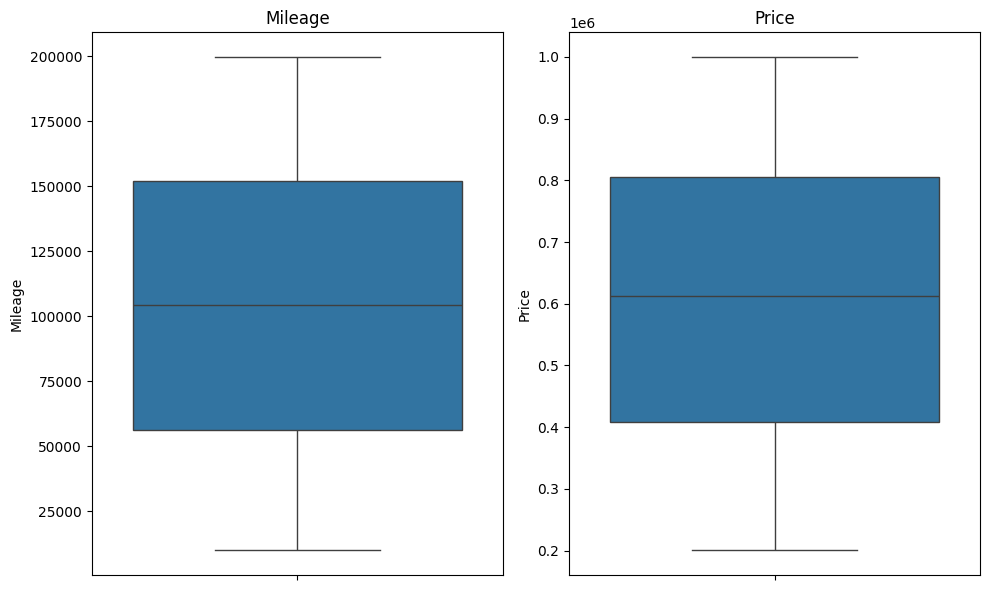

In [36]:
#Check for outliers

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot Mileage distribution on the first subplot (axes[0])
sns.boxplot(data['Mileage'], ax=axes[0])
axes[0].set_title('Mileage')

# Plot Price distribution on the second subplot (axes[1])
sns.boxplot(data['Price'], ax=axes[1])
axes[1].set_title('Price')

# Display the plots
plt.tight_layout()
plt.show()


In [37]:
#missingness
data.isnull().sum()

Company Name                  0
Car Name                      0
Variant                     262
Fuel Type                     0
Tyre Condition                0
Make Year                     0
Owner Type                    0
Registration Number           0
Mileage                       0
Price                         0
Transmission Type             0
Body Color                    0
Service Record                0
Insurance                     0
Registration Certificate      0
Accessories                 482
dtype: int64

In [38]:
#Handle missingness by imputing the mode since the missingness is in categorical variables
cols = ['Variant', 'Accessories']
for col in cols:
    mode_value = data[col].mode()[0] 
    data[col].fillna(mode_value, inplace=True)

In [39]:
data.duplicated().sum()

0

In [40]:
data.dtypes

Company Name                object
Car Name                    object
Variant                     object
Fuel Type                   object
Tyre Condition              object
Make Year                    int64
Owner Type                  object
Registration Number         object
Mileage                      int64
Price                        int64
Transmission Type           object
Body Color                  object
Service Record              object
Insurance                   object
Registration Certificate    object
Accessories                 object
dtype: object

## 4. Feature Engineering

#### 4.1 Create new features

In [41]:
# Car Age
current_year = datetime.now().year
data['Car Age'] = current_year - data['Make Year']


In [42]:
#Insurance status
data['Insurance_Status'] = data['Insurance'].apply(lambda x: 0 if 'No Current Insurance' in x else 1)

In [43]:
#Number of previous owners
data['Owner Type'] = data['Owner Type'].replace({'First': 1, 'Second': 2, 'Third': 3})


In [44]:
#drop unnecssary columns
data.drop(['Registration Number', 'Car Name', 'Make Year', 'Accessories'], axis=1, inplace=True)

#### 4.2 Encoding

In [45]:
# Ordinal encode Tyre Condition as there is an order
encoder = OrdinalEncoder(categories=[['Needs Replacement', 'Used', 'New']])
data['Tyre Condition Encoded'] = encoder.fit_transform(data[['Tyre Condition']])

# Drop the original 'Tyre Condition' column
data = data.drop('Tyre Condition', axis=1)

In [46]:
# Simplify service record

def simplify_service_record(record):
    if 'No service record' in record:
        return 'No Record'
    elif 'Full service history' in record:
        return 'Full History'
    else:
        return 'Major Service'

data['Service Record Simplified'] = data['Service Record'].apply(simplify_service_record)
data.drop('Service Record', axis=1, inplace=True)

In [47]:
# One-Hot Encoding non ordinal columns with a small number of unique values
one_hot_cols = ['Company Name', 'Variant', 'Fuel Type', 'Transmission Type', 'Body Color', 'Insurance', 'Registration Certificate', 'Service Record Simplified']

# Create a OneHotEncoder instance
ohe = OneHotEncoder(sparse_output=False, drop='first')  

# Perform one-hot encoding
one_hot_encoded = pd.DataFrame(ohe.fit_transform(data[one_hot_cols]), 
                               columns=ohe.get_feature_names_out(one_hot_cols))

# Concatenate back to the original dataframe
data_encoded = pd.concat([data.drop(one_hot_cols, axis=1), one_hot_encoded], axis=1)


#### 4.3 Feature scaling

In [48]:
#Columns to scale
numerical_features = ['Mileage', 'Car Age']

#Initialize the RobustScaler
scaler = RobustScaler()

#Scaling
data_encoded[numerical_features] = scaler.fit_transform(data[numerical_features])

data_scaled = data_encoded


## 5. Dimensionality Reduction

In [50]:
# Separate features and target variable
X = data_scaled.drop('Price', axis=1)
y = data_scaled['Price'] 
print(X.shape, y.shape)

(2500, 35) (2500,)


#### 5.1  Correlation Analysis

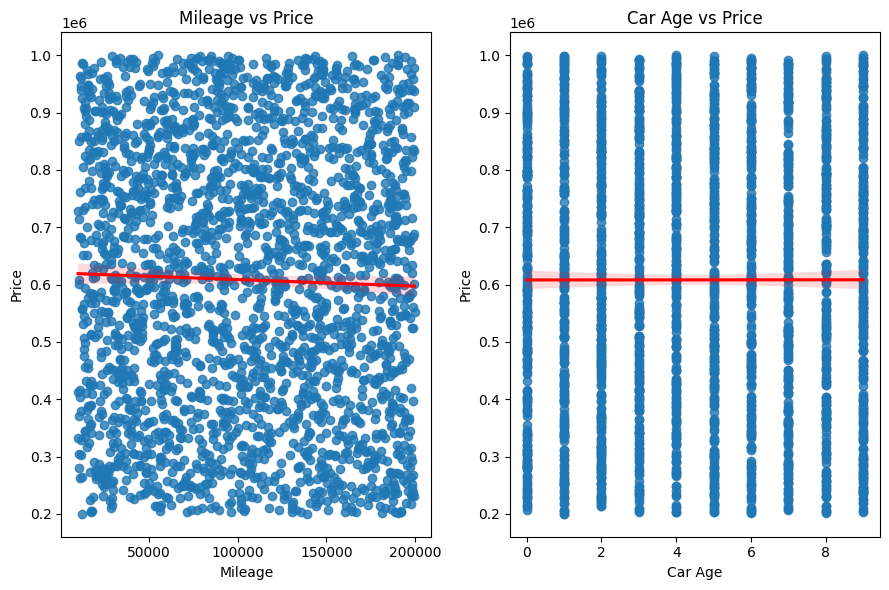

In [51]:
#Check the realtionship between numerical columns and the dependent variable

fig, axes = plt.subplots(1, 2, figsize=(9, 6))

# Scatter plot for Mileage vs Price
sns.regplot(x=data['Mileage'], y=data['Price'], ax=axes[0], line_kws={'color': 'red'})
axes[0].set_title('Mileage vs Price')


# Scatter plot for Car Age vs Price
sns.regplot(x=data['Car Age'], y=data['Price'], ax=axes[1], line_kws={'color': 'red'})
axes[1].set_title('Car Age vs Price')

plt.tight_layout()
plt.show()

- A linear relationship is non-existent between these features and price.

In [52]:
num_columns = data.select_dtypes(include='number').columns
num_columns

Index(['Owner Type', 'Mileage', 'Price', 'Car Age', 'Insurance_Status',
       'Tyre Condition Encoded'],
      dtype='object')

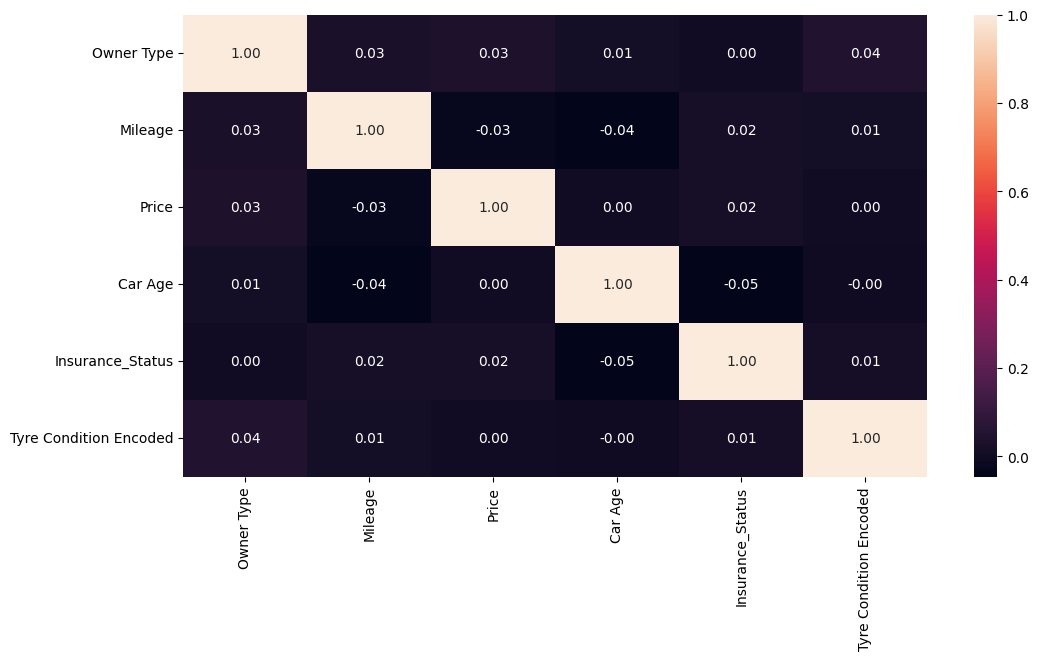

In [53]:
plt.figure(figsize=(12, 6))

# Create the heatmap of the correlation matrix
sns.heatmap(data[num_columns].corr(), annot=True, fmt='.2f')

# Display the plot
plt.show()

#### 5.2 Principal Component Analysis (PCA)

In [54]:
pca = PCA()
pca.fit(X)

PCA()

Text(0.5, 1.0, 'Explained Variance vs N-Components')

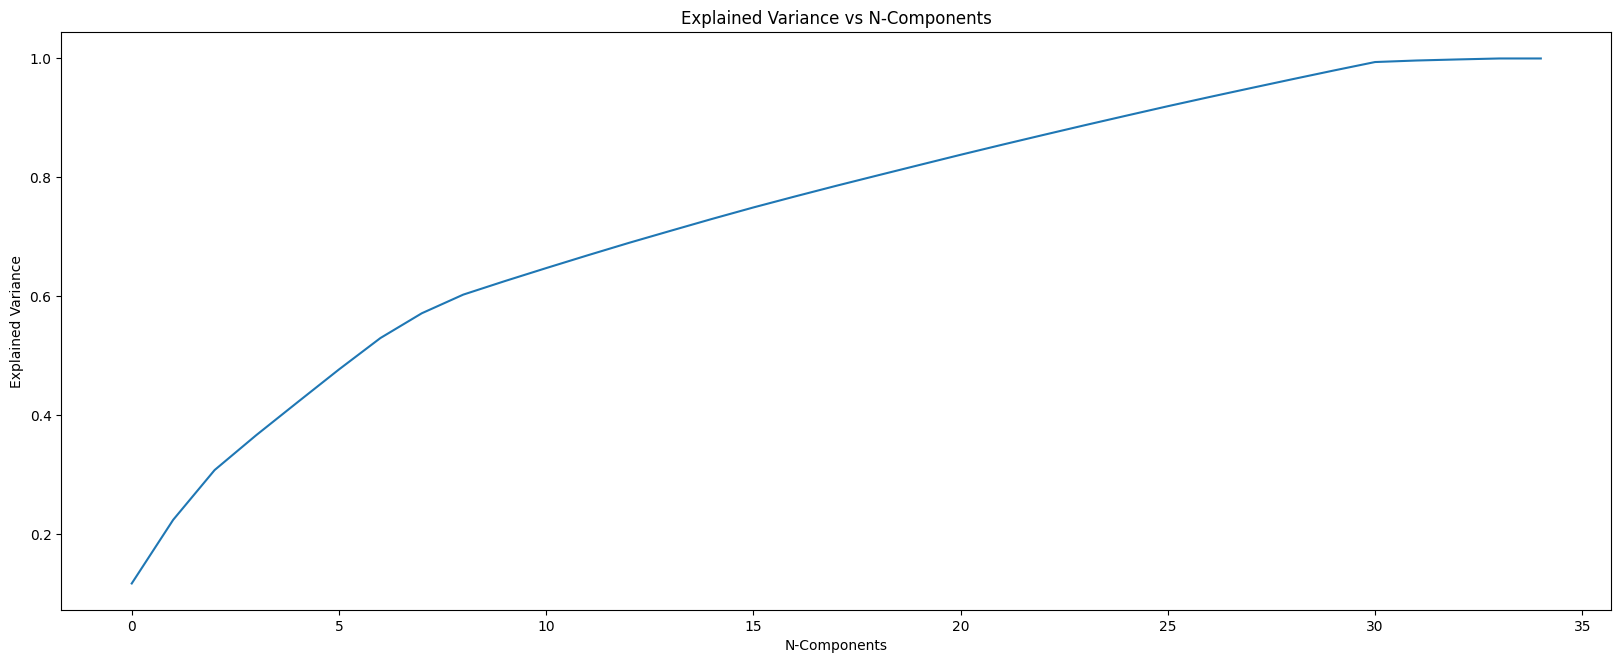

In [55]:
variance = pca.explained_variance_ratio_
components = np.arange(len(variance))

plt.figure(figsize=(20,7.5))
plt.plot(components, np.cumsum(variance))
plt.ylabel("Explained Variance"), plt.xlabel("N-Components")
plt.title("Explained Variance vs N-Components")

In [56]:
# select the ideal number of components
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)
print("Total Explained Variance: ", np.cumsum(pca.explained_variance_ratio_)[-1])

Total Explained Variance:  0.9797169368521821


In [57]:
#Convert PCA results to DataFrame
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.782022,0.660885,-0.653051,-0.718656,0.484173,0.353251,0.212997,0.517929,-0.001373,-0.301297,...,-0.243436,0.176218,0.418078,0.019425,0.146298,-0.139711,0.405380,-0.419226,-0.131139,0.107172
1,1.291921,0.171814,-0.744562,-0.273418,0.620819,-0.466996,-0.587755,-0.463261,-0.234286,-0.128609,...,0.268375,-0.041678,-0.408462,0.012178,0.138317,-0.319428,-0.308859,0.295966,-0.218516,-0.241160
2,0.657170,-0.597568,-0.688065,0.588231,0.263298,-0.692281,-0.748103,-0.443058,-0.275579,0.000276,...,0.372349,-0.135089,-0.360587,0.079565,0.182244,-0.347721,-0.313757,0.210849,-0.394257,-0.009715
3,0.616434,0.709840,0.718701,0.260589,-0.630913,0.536835,-1.201277,-0.515935,-0.354633,0.110564,...,0.709544,-0.367737,0.114592,0.017493,0.081431,-0.156560,0.102904,-0.245425,0.264235,-0.212682
4,-0.092020,0.017748,-0.709365,0.094513,-0.010302,-0.937606,-0.310825,0.517551,-0.302859,-0.541755,...,0.153890,-0.374907,0.025382,0.200926,0.263185,-0.030433,0.133907,-0.178081,0.044270,-0.165176


## 6. Modeling and Evaluation

#### 6.1. Train-Test Split

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

##### 6.2. Model Selection using cross validation

- Linear Models : LR, LASSO, RIDGE
- Non-linear Models : RF, BOOSTED MODELS, SVR

In [60]:
#Linear Regression
lr = LinearRegression()
scores = cross_val_score(lr, X_pca, y, cv=5, scoring='r2')
print(scores, scores.mean())

[ 0.00231817 -0.01958307 -0.01213841 -0.01117449 -0.04094269] -0.016304097388520213


In [61]:
# Polynomial
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
scores = cross_val_score(pipe, X, y, cv=5, scoring="r2")
print(scores, scores.mean())


[-0.34499671 -0.33520627 -0.37703853 -0.28185951 -0.36257723] -0.34033564883198225


In [62]:
# Ridge Regression
ridge = Ridge()
scores = cross_val_score(ridge, X_pca, y, cv=5, scoring='r2')
print(scores, scores.mean())

[ 0.0023869  -0.01943927 -0.01200547 -0.01111853 -0.04073944] -0.01618316227040546


In [63]:
# Support Vector Regression
svr = SVR(kernel='rbf')
scores = cross_val_score(svr, X, y, cv=5, scoring="r2")
print(scores, scores.mean())

[-1.33341650e-04  1.16846099e-07 -8.91397401e-03 -1.22105455e-05
 -6.30274526e-04] -0.0019379367778148636


In [64]:
#Decison Tree
dt = DecisionTreeRegressor()
scores = cross_val_score(dt, X_pca, y, cv=5, scoring='r2')
print(scores, scores.mean())

[-1.00373429 -0.99945205 -1.17401442 -1.00657703 -1.0263384 ] -1.0420232388162003


In [65]:
#RandomForest
rf = RandomForestRegressor()
scores = cross_val_score(rf, X, y, cv=5, scoring="r2")
print(scores, scores.mean())

[-0.09226395 -0.04472706 -0.07814888 -0.06669541 -0.09958707] -0.0762844721608023


In [66]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score

# Initialize XGBoost Regressor (Default parameters before tuning)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
scoring = make_scorer(r2_score)
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)

# Print cross-validation scores and mean score
print(f"Cross-Validation R-squared scores: {cv_scores}")
print(f"Mean R-squared score: {cv_scores.mean()}")


Cross-Validation R-squared scores: [-0.17388809 -0.33385921 -0.31135213 -0.1410898  -0.25822222]
Mean R-squared score: -0.24368228912353515
